Optimal_Solution:
x = 3.75
y = 1.5
Minimum_total_cost (Z) = 24.75


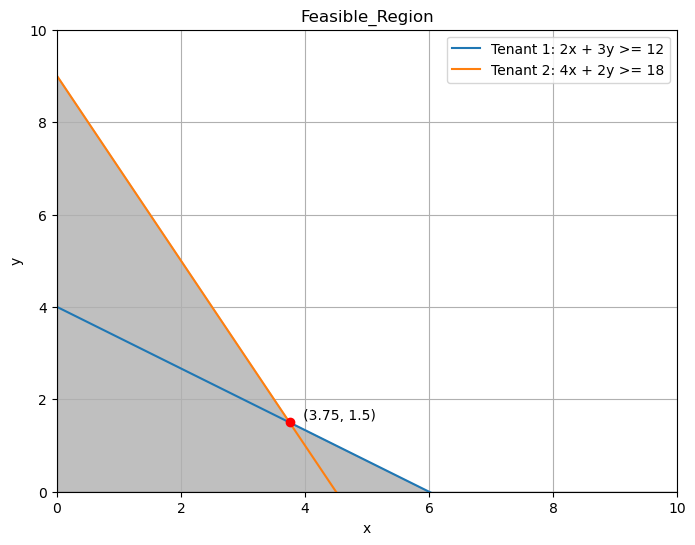

In [1]:
#QUESTION 4

import pulp
import numpy as np
import matplotlib.pyplot as plt

# Define the linear programming problem
lp_problem = pulp.LpProblem("Multi-Tenant_Resource_Sharing", pulp.LpMinimize)

# Define decision variables
x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)

# Define constraints for each tenant
lp_problem += 2*x + 3*y >= 12
lp_problem += 4*x + 2*y >= 18

# Define objective function
lp_problem += 5*x + 4*y

# Solve the problem
lp_problem.solve()

# Get the optimal solution
opt_x = pulp.value(x)
opt_y = pulp.value(y)
opt_z = pulp.value(lp_problem.objective)

print("Optimal_Solution:")
print(f"x = {opt_x}")
print(f"y = {opt_y}")
print(f"Minimum_total_cost (Z) = {opt_z}")

# Define vertices for plotting feasible region
x_values = np.linspace(0, 10, 100)
y1_values = (12 - 2*x_values) / 3
y2_values = (18 - 4*x_values) / 2

# Plot the constraints
plt.figure(figsize=(8, 6))
plt.plot(x_values, y1_values, label='Tenant 1: 2x + 3y >= 12')
plt.plot(x_values, y2_values, label='Tenant 2: 4x + 2y >= 18')
plt.fill_between(x_values, np.maximum(y1_values, y2_values), color='gray', alpha=0.5)

# Plot the optimal solution
plt.plot(opt_x, opt_y, 'ro')
plt.text(opt_x, opt_y, f'   ({opt_x}, {opt_y})', verticalalignment='bottom')

# Labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible_Region')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()

# Show plot
plt.grid(True)
plt.show()
